In [18]:
import numpy as np
from scipy.stats import truncnorm

input_nodes = 3
hidden_nodes = 4
output_nodes = 2
# Truncated normal distribution parameters
mean = 0
sd = 1
low = -2
upp = 2

wih = truncnorm((low - mean) / sd, (upp - mean) / sd).rvs((hidden_nodes, input_nodes))
who = truncnorm((low - mean) / sd, (upp - mean) / sd).rvs((output_nodes, hidden_nodes))

print("Input to Hidden Weights: ")
print(wih)
print("Hidden to Output Weights: ")
print(who)


Input to Hidden Weights: 
[[-1.05575382  1.48353803  1.46583684]
 [ 0.21928062  0.08143963  0.2207416 ]
 [-1.37525134  0.57008199 -0.63887765]
 [ 0.68454297 -0.68536347 -1.15389056]]
Hidden to Output Weights: 
[[-0.17127253 -1.26200943 -0.54334915  0.0026425 ]
 [ 0.71063583 -0.68532555  1.10305006  1.19373769]]


In [19]:
from sklearn.neural_network import MLPClassifier

X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 0, 0, 1]
clf = MLPClassifier(solver="adam", alpha=1e-5, hidden_layer_sizes=(5, 3), random_state=1)
clf.fit(X, y)

print("Trained MLP model:", clf)
print("Weights between input and first hidden layer:")
print(clf.coefs_[0])
print("Weights between first hidden layer and output layer:")
print(clf.coefs_[1])

Trained MLP model: MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 3), random_state=1)
Weights between input and first hidden layer:
[[-0.02896066  0.28428775 -0.73827919 -0.12355887 -0.47211108]
 [-0.57042845 -0.79227357 -0.12764227 -0.25820536  0.00092499]]
Weights between first hidden layer and output layer:
[[ 0.13562443 -0.02328308  0.00633813]
 [-0.44181749 -0.58406499  0.73647897]
 [ 0.62554227 -0.16002959  0.16887451]
 [ 0.47001586  0.61079909 -0.52933978]
 [-0.61310359 -0.39254013  0.47296745]]


C:\Users\Qadri\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Activity 4: Load Iris Mnist

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

(1797, 64)


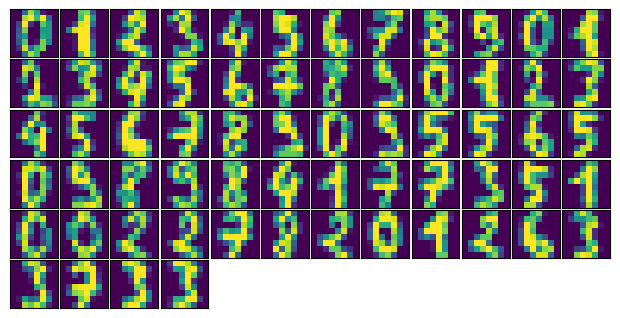

In [21]:
import matplotlib.pyplot as plt
# setup the figure
fig = plt.figure(figsize = (6,6))
fig.subplots_adjust(left = 0, right = 1, bottom=0, top = 1, hspace = 0.05, wspace  = 0.05)
# plot the digits
for i in range(64):
  ax = fig.add_subplot(12, 12, i +1, xticks = [], yticks = [])
  ax.imshow(digits.images[i])

In [22]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(digits.data, digits.target, train_size=0.8,test_size=0.2, random_state=1)

In [23]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5,), activation="logistic", alpha=1e-4, solver="sgd", tol=1e-4, random_state=1, learning_rate_init=3, verbose=True)
mlp.fit(train_data, train_labels)


Iteration 1, loss = 2.31777578
Iteration 2, loss = 2.12389676
Iteration 3, loss = 2.01276098
Iteration 4, loss = 1.96620606
Iteration 5, loss = 2.02525658
Iteration 6, loss = 2.10316363
Iteration 7, loss = 2.14075391
Iteration 8, loss = 2.31363203
Iteration 9, loss = 2.19566530
Iteration 10, loss = 2.06005895
Iteration 11, loss = 2.05778564
Iteration 12, loss = 2.04359403
Iteration 13, loss = 2.00446587
Iteration 14, loss = 1.98030024
Iteration 15, loss = 1.98516708
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='logistic', hidden_layer_sizes=(5,),
              learning_rate_init=3, random_state=1, solver='sgd', verbose=True)

In [24]:
from sklearn.metrics import accuracy_score

predictions_train = ndp.predict(train_data)
print("Training Accuracy:", accuracy_score(predictions_train, train_labels))
predictions_test = ndp.predict(test_data)
print("Test Accuracy:", accuracy_score(predictions_test, test_labels))


Training Accuracy: 0.1906750173973556
Test Accuracy: 0.21944444444444444


In [25]:
from sklearn.metrics import confusion_matrix

c1 = confusion_matrix(predictions_train, train_labels)
c2 = confusion_matrix(predictions_test, test_labels)

print("Confusion Matrix 1=")
print(c1)
print()
print("Confusion Matrix 2=")
print(c2)

Confusion Matrix 1=
[[135  15  15 121   0  34   4   6  16 127]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   1   0]
 [  0 131 121  21 143 115 139 134 128  19]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   4   0   0   2   1   2   0   0]]

Confusion Matrix 2=
[[43  3  8 36  0  7  1  2  8 30]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0 32 27  5 38 23 36 35 21  4]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0]]


In [26]:
from sklearn.metrics import classification_report 
print(classification_report(predictions_test, test_labels))

              precision    recall  f1-score   support

           0       1.00      0.31      0.48       138
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.97      0.16      0.28       221
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1

    accuracy                           0.22       360
   macro avg       0.20      0.05      0.08       360
weighted avg       0.98      0.22      0.35       360



C:\Users\Qadri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Qadri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Qadri\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
